## South African language identification hackathon Exam

## Makgothoma MP

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---



---

In [49]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries For Data Preprocessing:
import re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import TreebankWordTokenizer
from nltk import WordNetLemmatizer

# Libraries For Feature Extraction, Model Building and Evaluation:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report

# Library For Saving and Retrieving the Model File:
import pickle

# Library For handling warnings:
import warnings

warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 45 # random_state parameter for the train_test_split function

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, I will load the language training dataset provided for the competition, as a *`pandas`* DataFrame.    

---

In [50]:
# Loading in the Data
train_df =  pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


---


I will begin by displaying the first five rows of the Dataframe.

In [51]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [52]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [53]:
test_df.info

<bound method DataFrame.info of       index                                               text
0         1  Mmasepala, fa maemo a a kgethegileng a letlele...
1         2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2         3         Tshivhumbeo tshi fana na ngano dza vhathu.
3         4  Kube inja nelikati betingevakala kutsi titsini...
4         5                      Winste op buitelandse valuta.
...     ...                                                ...
5677   5678                   You mark your ballot in private.
5678   5679  Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679   5680  E Ka kopo etsa kgetho ya hao ka hloko, hobane ...
5680   5681  TB ke bokudi ba PMB, mme Morero o tla lefella ...
5681   5682              Vakatjhela iwebhusayidi yethu ku-www.

[5682 rows x 2 columns]>

In [54]:
# look at Dataset information:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [55]:
print(train_df['lang_id'].unique())

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


The above displayed is a list of the language codes representing each of the 11 official South African languages. These are also class labels.
For the purpose of building an accurate classification model later in this project, it is important to ensure that the class labels are balanced.
Class imbalance is a fairly common problem in classification tasks. If left unresolved, a trained model will be better at classifying the majority class than any other. 

With this in mind, the next step is to Display the class distribution by creating a bar graph/plot. 
For this, I will use the `Matplotlib` and `Seaborn` Libraries.

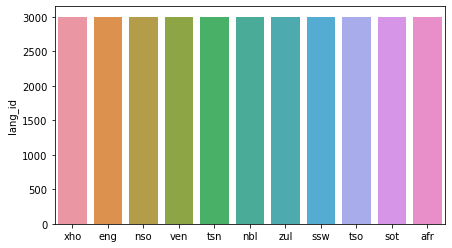

In [56]:
# Plot Class Distributions:
plt.figure(figsize=(7,4))
sns.barplot(data=train_df, x=train_df['lang_id'].unique(), y=train_df['lang_id'].value_counts())
plt.show()

The bar plot indicates that there is an even class distribution. 3000 records for each respective class.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


---

In [57]:
# Define Function to remove punctuation
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

A new column will be created to hold the cleaned data for the subsequent data cleaning steps.

In [58]:
# Create a New Column for clean data:
train_df['clean_text'] = train_df['text'].apply(remove_punctuation)

#### Tokenization

The process of tokenizing or splitting a string of text into a list of tokens is known as tokenization. Tokens can be thought of as pieces; for example, a word in a sentence is a token, and a sentence is a token in a paragraph.

In any NLP pipeline, tokenization is the first step. It has a major impact on the rest of the pipeline. Unstructured data and natural language text are broken down into chunks of information that can be regarded as separate elements using a tokenizer. The tokenizer to be used in this case is the `TreeBankWordTokenizer` from the `nltk` Library.

In [59]:
# Converting text into Tokens(word-lists):
tokenizer = TreebankWordTokenizer()
train_df['clean_text'] = train_df['clean_text'].apply(tokenizer.tokenize)

# Display the DataFrame after Tokenization:
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


#### Stopword Removal

These are words that occur frequently in sentences, however, they do not contribute much to the information in a sentence. By stripping away these words, the low-level information is removed from the data, allowing the focus to remain on the important information. For this task, the `nltk` Library's Stopword Dictionary will be used for reference.

In [60]:
# Define Function to Remove Stopwords:
def chop_stopwords(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [61]:
# Removing StopWords from the data:
train_df['clean_text'] = train_df['clean_text'].apply(chop_stopwords)

#### Lemmatization

Lemmatization is a technique for reducing words to a normalized form. The transformation of lemmatization requires the use of a dictionary to map different versions of a word back to its root form. The `nltk` Library's `WordNetLemmatizer` will be used for this task.

In [62]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
train_df['clean_text'] = train_df['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


The Data Engineering phase has been completed, perhaps the new tokenized column should be reverted back to its normal state. This would show the new cleaner state of our data much more clearly.

In [63]:
# Revert back to sentence:
for i in range(len(train_df['clean_text'])):
    train_df['clean_text'][i] = " ".join(train_df['clean_text'][i])

# Display Dataframe:
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


---

#### Split Data Into Features and Labels:

In [64]:
# Define Features and Labels:
X = train_df['clean_text'] # Features
y = train_df['lang_id'] # Labels

#### Bag of Words:

There is a need for a way to represent text data for the Classification Machine Learning Algorithm. For this, the bag-of-words method helps with the task. It is a technique used to extract features from the text, for use in Machine Learning Algorithms. With this approach, the tokenized words for each observation are used to find out the frequency of each token. 

I have decided to use the `nltk` Library's `TfidfVectorizer` for this task because it often performs better at feature extraction than the `CountVectorizer`. I will begin by creating an instance of the vectorizer. The time has finally come to do some modeling. I will begin by splitting the DataFrame, thereafter extracting features (X) and properly defining the labels/target variable (y).

In [65]:
# Create Vectorizer Instance:
vect = TfidfVectorizer()                                             

The next step is to use the `fit_transform()` to extract the features. This also extracts the vocabulary of the features.

In [66]:
# fit_transform extract features:
X = vect.fit_transform(X)

The Features and Labels will be split into a training set, for training the Classification Model and the validation set, for model validation. This will require the use of the `train_test_split()` function of Scikit-Learn (`sklearn`). The parameter of this function will be used to set the *random_state* as well as the *test_size*. The latter refers to how much of the data will be used for testing the trained model. For this task, the *test_size* parameter will be set to 20% (0.2).

In [67]:
# Tain - Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

I will first create an instance of the **ComplementNB** Classifier, then proceed to train it using the **train set** defined in the previous step. The `.fit()` function will be used for this.

In [68]:
# Creating Instance of Model:
nb = ComplementNB()

# Training the Naive Bayes Classifier using the training set:
nb.fit(X_train, y_train)

ComplementNB()

Now that the model has been trained, the next step is to validate it using the **validation set** defined earlier. This will require the use of the trained model to perform classification or to "make predictions" on the **validation set**, using `.predict()`.

In [69]:
# Using trained model, on the test set:
y_pred = nb.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


---

##### Performance Metrics:

In [70]:
# Evaluating Naive Bayes Model:
print(classification_report(y_test, y_pred, target_names=train_df['lang_id'].unique()))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       599
         eng       0.99      1.00      1.00       632
         nso       1.00      1.00      1.00       595
         ven       1.00      1.00      1.00       582
         tsn       1.00      1.00      1.00       610
         nbl       1.00      1.00      1.00       607
         zul       1.00      1.00      1.00       579
         ssw       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       605
         sot       0.99      1.00      0.99       591
         afr       1.00      0.98      0.99       589

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



As seen above, the trained `Complement Naive Bayes` performs exceptionally well on unseen data. This obviously makes it a great choice among classification models.
I will now store the model. This ensures that it can be used at a later time, without the need to train a new model all over again. 
The `pickle` Library is well suited for this task.

#### Storing the Trained Model:

In [71]:
save_path = 'NB_model.pkl' # Indicate the model's file name

with open(save_path, 'wb') as file:
    pickle.dump(nb, file) # Saving the model as a retrievable file

Now that the model is safely stored as a file, it can be retrieved and used for Classification tasks on new Datasets.

#### Model Predictions on the Test Dataset:
For the task of classification as with regression tasks, it is recommended that the original data preprocessing steps are repeated for the new dataset. The test dataset will be loaded and taken through the same preprocessing steps performed in the training dataset. This ensures that the data is presented to the trained model in the appropriate format.

#### Load the Test Dataset:

In [72]:
# Loading the data as a Pandas DataFrame:
test_df = pd.read_csv('test_set.csv')

In [73]:
# Displying the DataFrame:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [74]:
# Remove Punctuation:
test_df['clean_text'] = test_df['text'].apply(remove_punctuation)

#### Tokenization

In [75]:
# Converting text into Tokens(word-lists):
test_df['clean_text'] = test_df['text'].apply(tokenizer.tokenize)
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, a, a, kgethegileng, ..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


#### Stopword Removal

In [76]:
test_df['clean_text'] = test_df['clean_text'].apply(chop_stopwords)

#### Lemmatization

In [77]:
# Lemmatize the text Messages:
lemmatizer = WordNetLemmatizer()
test_df['clean_text'] = test_df['clean_text'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","[Mmasepala, ,, fa, maemo, kgethegileng, letlel..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[Uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,"[Tshivhumbeo, tshi, fana, na, ngano, dza, vhat..."
3,4,Kube inja nelikati betingevakala kutsi titsini...,"[Kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,"[Winste, op, buitelandse, valuta, .]"


In [78]:
# Revert back to sentence:
for i in range(len(test_df['clean_text'])):
    test_df['clean_text'][i] = " ".join(test_df['clean_text'][i])
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...","Mmasepala , fa maemo kgethegileng letlelela kg..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu .
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta .


Looking at the first row of the **clean_test** column, it appears that some punctuation characters slipped through. There is a need to call the `remove_punctuation()` function again, just to be thorough.

In [79]:
test_df['clean_text'] = test_df['clean_text'].apply(remove_punctuation)
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo kgethegileng letlelela kga...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


#### Load Saved Model:

In [80]:
model_path = 'NB_model.pkl'
with open(model_path, 'rb') as file:
    unpickled_model = pickle.load(file)

Just like before, the feature column must be well defined, before the process of feature extraction.
This time, there is no need to fit the `Tfidfvectorizer` to the data again, because the 'vocabulary' has already been learned.
What needs to happen now is purely feature extraction, and for this, the `.transform()` method will be used.

In [81]:
X1 = test_df['clean_text'] # Features
X1 = vect.transform(X1) # Extract features from the data using Tfidfvectorizer

Classification tasks are all about determining the **probability** of an observation belonging to a particular class (discreet values).

#### Classification

In [82]:
y_hat = unpickled_model.predict(X1)

The task has been performed successfully. For the purpose of making Kaggle submissions, the results will be stored in the form of a `pandas` DataFrame and saved as a `.csv` file.

In [83]:
# Creating DataFrame for the Results:
preds = pd.DataFrame()
preds['index'] = test_df.index + 1
preds['lang_id'] = y_hat
preds.set_index('index', inplace=True)

In [84]:
# Save prediction as .csv:
preds.to_csv('nb_preds.csv')

Finally, I will have a look at the new DataFrame.

In [85]:
preds.head()

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr


<a id="seven"></a>
## 7. Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
I will choose Naive Bayes Classifier. 
It is a probabilistic Machine Learning Model that is based on the **Bayes theorem**.


---